In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Get all filenames for survey
survey_dir = "../submissions/FirstDaySurvey/"
figure_dir = "../media/"
my_survey = "SurveyWhiteMN.txt"

In [3]:
filenames = os.listdir(survey_dir)
filenames

['SurveyAbdiSM.txt',
 'SurveyCHAUSSEELC.txt',
 'SurveyDugasSL.txt',
 'SurveyEtzelGC.txt',
 'SurveyHAMMONDAK.txt',
 'SurveyHussainY.txt',
 'SurveyJohnsonLS.txt',
 'SurveyJOSHUAJM.txt',
 'SurveyKhanS.txt',
 'SurveyMALDONADOAJ.txt',
 'SurveyMCBROOMAB.txt',
 'SurveyMeyerSJ.txt',
 'SurveyNUTIH.txt',
 'SurveyOkonAO.txt',
 'SurveyOuslanAM.txt',
 'SurveyPlascenciaJ.txt',
 'SurveyPremaratneD.txt',
 'SurveyRiveraJA.txt',
 'SurveyRouseTO.txt',
 'SurveyRuizKO.txt',
 'SurveyShaposhnikovSN.txt',
 'SurveyWhiteMN.txt',
 'SurveyYANGA.txt']

In [4]:
# Open my survey and get the names of the things
with open(survey_dir + my_survey, "r") as f:
    my_text = f.read()
    f.close()
    
# Look for where the data starts
idx = my_text.find("THING : VALUE")

# Skip 15 characters to go past that header and the blank line
idx += 15

# Make a shorter string with only the stuff past idx
my_short_text = my_text[idx:]
print(my_short_text)

# Make a list of the lines below that
my_split_text = my_short_text.splitlines()
print(my_split_text)

C / C++ : 4
ChatGPT: 4
Claude : 4
Economics : 8
Fortran : 3
git : 7
GitHub : 7
Grok : 3
Julia : 3
Jupyter : 7
LaTeX : 7
Litmaps: 3
Markdown : 6
Matlab : 5
Overleaf: 6
PaperPile : 3
Python : 7
R : 3
SAS : 3
Stata : 6
The Simpsons : 5
Zenodo : 4

['C / C++ : 4', 'ChatGPT: 4', 'Claude : 4', 'Economics : 8', 'Fortran : 3', 'git : 7', 'GitHub : 7', 'Grok : 3', 'Julia : 3', 'Jupyter : 7', 'LaTeX : 7', 'Litmaps: 3', 'Markdown : 6', 'Matlab : 5', 'Overleaf: 6', 'PaperPile : 3', 'Python : 7', 'R : 3', 'SAS : 3', 'Stata : 6', 'The Simpsons : 5', 'Zenodo : 4']


In [5]:
# Loop over each line and extract the name of the thing
names_of_things = [] # initialize and empty list
N_things = len(my_split_text) # number of items
for n in range(N_things):
    this_line = my_split_text[n] # get the n-th item
    idx = this_line.find(":") # look for the colon
    name = this_line[:idx] # take what's before the colon
    stripped_name = name.strip() # remove any extra spaces on either end
    names_of_things.append(stripped_name)

In [6]:
# Define a function that takes a single data line and returns the number
def get_number_from_dataline(line):
    i = line.find(":") + 1
    num = int(line[i:])
    return num

In [7]:
# Define a function that gets all of the numbers from someone's survey data
def get_numbers_from_survey_data(survey_lines):
    N = len(survey_lines)
    values = np.empty(N) # initialize an empty array
    for n in range(N):
        try:
            val = get_number_from_dataline(survey_lines[n])
        except:
            val = np.nan # fallback
        values[n] = val # put it in our array
    return values

In [8]:
# Define a function that reproduces the steps above to make a list of survey data lines
def get_survey_data_from_file(filepath):
    with open(filepath, 'r') as f:
        my_text = f.read()
        f.close()
    idx = my_text.find("THING : VALUE") + 15 # Where the data should start
    split_text = my_text[idx:].splitlines()
    return split_text

# Define a function that puts it all together, extracting survey numbers given a filepath
def get_numbers_from_file(filepath):
    these_survey_lines = get_survey_data_from_file(filepath)
    these_values = get_numbers_from_survey_data(these_survey_lines)
    return these_values

mnw_survey_data = get_numbers_from_file(survey_dir + my_survey)

In [9]:
# Define a function that makes a 2D array of survey information, one student per row
def get_numbers_from_all_students(file_list):
    N_surveys = len(file_list)
    all_students_data = np.empty((N_surveys-1, N_things)) # initialize survey data array
    i = 0
    
    # Loop over surveys
    for filename in file_list:
        if filename == my_survey:
            continue # skip this file if it's MNW's!
        this_filepath = survey_dir + filename
        this_row_data = get_numbers_from_file(this_filepath)
        all_students_data[i,:] = this_row_data # put it in the 2D array
        i += 1 # increment the row counter
    
    return all_students_data

In [10]:
# Define a function that produces a histogram of responses for one thing
def make_histogram_for(name, thing_names, survey_data, my_survey, fig_file=None):
    try:
        n = thing_names.index(name) # get column number
    except:
        raise ValueError("Thing called " + name + " isn't in the list of names!")
    
    # Get the column data for the thing and relabel NaNs as zeros
    this_col = survey_data[:,n]
    this_col[np.isnan(this_col)] = 0.0
    this_col = this_col.astype(int) # convert data to integers
    
    # Get counts of each response
    counts = np.zeros(10)
    for j in range(this_col.size): # for each student...
        v = this_col[j] # ...get their response...
        counts[v] += 1 # ...and add one to the appropriate count
        
    # Make a histogram plot with blue bars for students
    w = 0.4 # half-width of our bars
    for v in range(10): # for each possible response...
        plt.fill_between([v-w, v+w], [counts[v], counts[v]], color='b')
        
    # Add a red box on top for my survey
    v = int(my_survey[n])
    plt.fill_between([v-w, v+w], [counts[v], counts[v]], [counts[v]+1, counts[v]+1], color='r')
    
    # Format the figure
    plt.xlim(-0.7, 9.7)
    plt.ylim(0., None)
    plt.xlabel("Student response")
    plt.ylabel("Number of responses")
    plt.xticks(np.arange(10))
    plt.title("Histogram of student familiarity with " + name)
    plt.tight_layout()
    
    # Save the figure to disk if a filename is provided
    if fig_file is not None:
        filepath = figure_dir + fig_file + ".pdf"
        plt.savefig(filepath)
    plt.show()
    if fig_file is not None:
        print("Saved histogram as " + filepath)

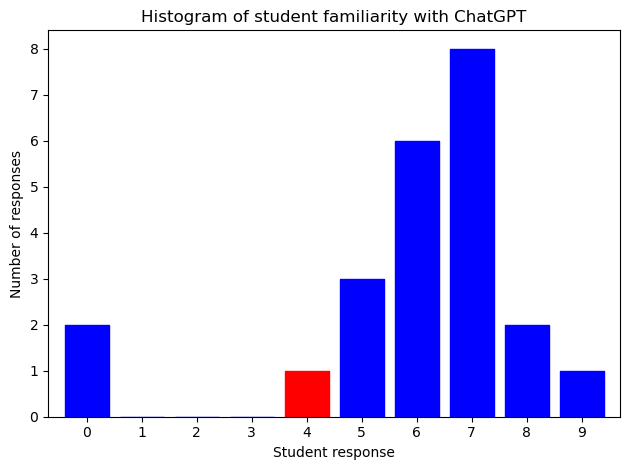

In [13]:
# Actually read student data
student_survey_data = get_numbers_from_all_students(filenames)

# Make lambda functions for convenient usage
make_fig = lambda x : make_histogram_for(x, names_of_things,
                                         student_survey_data,
                                         mnw_survey_data,)

make_and_save_fig = lambda x : make_histogram_for(x, names_of_things,
                                                  student_survey_data,
                                                  mnw_survey_data,
                                                  x.replace(" ","") + "Hist")

make_fig("ChatGPT")